# Web Scraping com Python

## Entendo estrutura de uma página na web (html)

- Páginas da internet são arquivos `.html`
- O conteúdo das páginas são separadas por blocos (tags)
- Dentro de cada bloco é que se encontram as informações de interesse

Tags mais comuns:
- `<h1>`
- `<h2>`
- `<h3>`
- `<p>`
- `<div>`
- `<a>`
- `<table>`
    - `<tr>`
    - `<th>`
    - `<td>`

## Scraping simples

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(open('scraping.html'), 'html.parser')

In [ ]:
soup.find_all('div')

In [ ]:
data = soup.find_all('td')
data

In [ ]:
data[3].string

In [ ]:
for element in soup.find_all('tr')[1].find_all('td'):
    print (element.string)

## Scraping `http://books.toscrape.com/`

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [2]:
response = requests.get('http://books.toscrape.com/')

In [3]:
soup = BeautifulSoup(response.content, 'html.parser')

### Título

In [5]:
soup.find('article', class_='product_pod').find('h3').a['title']

'A Light in the Attic'

### Preço

In [7]:
soup.find('p', class_='price_color').text

'£51.77'

In [9]:
soup.find('p', class_='price_color').text.replace('£', '')

'51.77'

In [10]:
float(soup.find('p', class_='price_color').text.replace('£', ''))

51.77

### Avaliação

In [13]:
soup.find('article', class_='product_pod').find('p')

<p class="star-rating Three">
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
<i class="icon-star"></i>
</p>

In [14]:
soup.find('article', class_='product_pod').find('p').text

'\n\n\n\n\n\n'

In [15]:
soup.find('article', class_='product_pod').find('p')['class']

['star-rating', 'Three']

In [16]:
soup.find('article', class_='product_pod').find('p')['class'][1]

'Three'

### Todos os livros

In [17]:
soup.find_all('article', class_='product_pod')

[<article class="product_pod">
 <div class="image_container">
 <a href="catalogue/a-light-in-the-attic_1000/index.html"><img alt="A Light in the Attic" class="thumbnail" src="media/cache/2c/da/2cdad67c44b002e7ead0cc35693c0e8b.jpg"/></a>
 </div>
 <p class="star-rating Three">
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 <i class="icon-star"></i>
 </p>
 <h3><a href="catalogue/a-light-in-the-attic_1000/index.html" title="A Light in the Attic">A Light in the ...</a></h3>
 <div class="product_price">
 <p class="price_color">£51.77</p>
 <p class="instock availability">
 <i class="icon-ok"></i>
     
         In stock
     
 </p>
 <form>
 <button class="btn btn-primary btn-block" data-loading-text="Adding..." type="submit">Add to basket</button>
 </form>
 </div>
 </article>,
 <article class="product_pod">
 <div class="image_container">
 <a href="catalogue/tipping-the-velvet_999/index.html"><img alt="Tipping the Velvet" class="thu

In [23]:
articles = soup.find_all('article', class_='product_pod')

In [21]:
len(articles)

20

In [27]:
livros = {'Título': [], 'Preço': [], 'Avaliação': []}
for article in articles:
    titulo = article.find('h3').a['title']
    preco = float(article.find('p', class_='price_color').text.replace('£', ''))
    avaliacao = article.find('p')['class'][1]
    livros['Título'].append(titulo)
    livros['Preço'].append(preco)
    livros['Avaliação'].append(avaliacao)

In [28]:
livros

{'Título': ['A Light in the Attic',
  'Tipping the Velvet',
  'Soumission',
  'Sharp Objects',
  'Sapiens: A Brief History of Humankind',
  'The Requiem Red',
  'The Dirty Little Secrets of Getting Your Dream Job',
  'The Coming Woman: A Novel Based on the Life of the Infamous Feminist, Victoria Woodhull',
  'The Boys in the Boat: Nine Americans and Their Epic Quest for Gold at the 1936 Berlin Olympics',
  'The Black Maria',
  'Starving Hearts (Triangular Trade Trilogy, #1)',
  "Shakespeare's Sonnets",
  'Set Me Free',
  "Scott Pilgrim's Precious Little Life (Scott Pilgrim #1)",
  'Rip it Up and Start Again',
  'Our Band Could Be Your Life: Scenes from the American Indie Underground, 1981-1991',
  'Olio',
  'Mesaerion: The Best Science Fiction Stories 1800-1849',
  'Libertarianism for Beginners',
  "It's Only the Himalayas"],
 'Preço': [51.77,
  53.74,
  50.1,
  47.82,
  54.23,
  22.65,
  33.34,
  17.93,
  22.6,
  52.15,
  13.99,
  20.66,
  17.46,
  52.29,
  35.02,
  57.25,
  23.88,
  

## Data Science

In [29]:
df = pd.DataFrame(livros)

In [30]:
df

,Título,Preço,Avaliação
0,A Light in the Attic,51.77,Three
1,Tipping the Velvet,53.74,One
2,Soumission,50.10,One
3,Sharp Objects,47.82,Four
4,Sapiens: A Brief History of Humankind,54.23,Five
5,The Requiem Red,22.65,One
6,The Dirty Little Secrets of Getting Your Dream...,33.34,Four
7,The Coming Woman: A Novel Based on the Life of...,17.93,Three
8,The Boys in the Boat: Nine Americans and Their...,22.60,Four
9,The Black Maria,52.15,One


In [31]:
df['Avaliação'] = df['Avaliação'].map({'One': 1, 'Two': 2, 'Three': 3, 'Four':4, 'Five': 5})

In [32]:
df

,Título,Preço,Avaliação
0,A Light in the Attic,51.77,3
1,Tipping the Velvet,53.74,1
2,Soumission,50.10,1
3,Sharp Objects,47.82,4
4,Sapiens: A Brief History of Humankind,54.23,5
5,The Requiem Red,22.65,1
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4
7,The Coming Woman: A Novel Based on the Life of...,17.93,3
8,The Boys in the Boat: Nine Americans and Their...,22.60,4
9,The Black Maria,52.15,1


In [33]:
df.groupby('Avaliação').mean()

,Preço
Avaliação,
1,40.018333
2,36.830000
3,42.316667
4,31.105000
5,39.750000


<AxesSubplot:xlabel='Avaliação'>

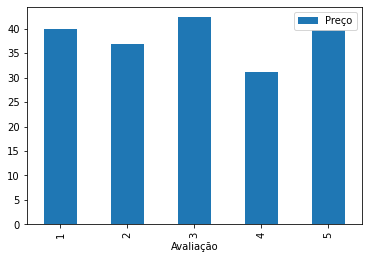

In [34]:
df.groupby('Avaliação').mean().plot(kind='bar')

### Intervalos de preço

In [43]:
df['Intervalo Preço'] = pd.cut(df['Preço'], bins=[0, 10, 20, 40, 50, 60])

In [44]:
df

,Título,Preço,Avaliação,Intervalo Preço
0,A Light in the Attic,51.77,3,"(50, 60]"
1,Tipping the Velvet,53.74,1,"(50, 60]"
2,Soumission,50.10,1,"(50, 60]"
3,Sharp Objects,47.82,4,"(40, 50]"
4,Sapiens: A Brief History of Humankind,54.23,5,"(50, 60]"
5,The Requiem Red,22.65,1,"(20, 40]"
6,The Dirty Little Secrets of Getting Your Dream...,33.34,4,"(20, 40]"
7,The Coming Woman: A Novel Based on the Life of...,17.93,3,"(10, 20]"
8,The Boys in the Boat: Nine Americans and Their...,22.60,4,"(20, 40]"
9,The Black Maria,52.15,1,"(50, 60]"


<AxesSubplot:xlabel='Intervalo Preço'>

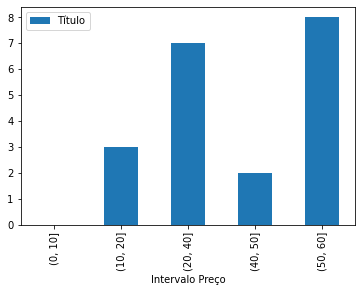

In [46]:
df[['Intervalo Preço', 'Título']].groupby('Intervalo Preço').count().plot(kind='bar')